In [151]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import openpyxl 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas_profiling

In [152]:
def reverse(txt):
    return txt[::-1]

In [153]:
reverse('נב')

'בנ'

In [154]:
data=pd.read_excel('data final.xlsx',engine='openpyxl')
df=data.copy()

In [155]:
len(data)

129556

In [156]:
data['קוד לקוח'].nunique()

862

In [157]:
columns={'תאריך_קריאה':'t_call',
         'סוג ארוע':'sug_erua',
         'קהילה / דיור מוגן':'residence_type',
         'שנה':'year',
         'שעה -1':'hour',
         'חודש':'month',
         'מגדר':'gender_name',
         'מגדר 4ז ,5נ , 6זוג':'gender_code',
         'קוד לקוח':'id',
         'יום':'day',
         'סוג יום':'day_type',
         'תאור_פעולה':'action_desc',
         'עם מי גר':'lon_desc',
         'רמת בדידות 1גר לבד , 2בן זוג , 3 בן משפחה':'lon_code',
         'סוג קטגוריה':'type_category',
         'קטגוריות פעולה':'act_category',
         'עונה':'season'
}

In [158]:
x=data.drop_duplicates()
print('num of duplicates rows',len(data)-len(x))

num of duplicates rows 16698


In [159]:
data=data.drop_duplicates()
data = data.drop(['כפילות','תאריך_התחלה','תאריך_סיום','ארגון','שעה','תאריך_קריאה.1','חודש.1','תאריך_קריאה.2'], axis=1)
data

קהילה / דיור מוגן        סוג ארוע             תאריך_קריאה  חודש  \
0                  קהילה        חשמל ECI 2012-01-01 00:26:00.157     1   
1                  קהילה    בדיקת תקינות 2012-01-01 04:05:12.583     1   
2                  קהילה        ECI לחצן 2012-01-01 08:14:03.653     1   
4                  קהילה        ECI לחצן 2012-01-01 08:14:03.653     1   
7                  קהילה        ECI לחצן 2012-01-01 08:14:03.653     1   
...                  ...             ...                     ...   ...   
129551             קהילה  סוללה חלשה ECI 2017-12-31 19:30:11.897    12   
129552             קהילה  סוללה חלשה ECI 2017-12-31 19:30:21.680    12   
129553         דיור מוגן  סוללה חלשה ECI 2017-12-31 19:33:40.270    12   
129554         דיור מוגן  סוללה חלשה ECI 2017-12-31 22:02:29.747    12   
129555         דיור מוגן    בדיקת תקינות 2017-12-31 23:31:14.740    12   

        שעה -1   שנה  סוג יום    יום  קוד לקוח  מגדר 4ז ,5נ , 6זוג  מגדר  \
0            0  2012  יום חול  ראשון    237588                 5.0  נקבה   
1            4  2012  יום חול  ראשון    241233                 5.0  נקבה   
2            8  2012  יום חול  ראשון    241436                 6.0   זוג   
4            8  2012  יום חול  ראשון    241436                 6.0   זוג   
7            8  2012  יום חול  ראשון    241436                 6.0   זוג   
...        ...   ...      ...    ...       ...                 ...   ...   
129551      19  2017  יום חול  ראשון    239310                 5.0  נקבה   
129552      19  2017  יום חול  ראשון    227294                 5.0  נקבה   
129553      19  2017  יום חול  ראשון      5626                 5.0  נקבה   
129554      22  2017  יום חול  ראשון      2238                 5.0  נקבה   
129555      23  2017  יום חול  ראשון    237360                 5.0  נקבה   

        רמת בדידות 1גר לבד , 2בן זוג , 3 בן משפחה עם מי גר    תאור_פעולה  \
0                                               1   גר לבד           NaN   
1                                               1   גר לבד           NaN   
2                                               2   בן זוג  רופא - הוזמן   
4                                               2   בן זוג   רופא - הגיע   
7                                               2   בן זוג   רופא - בקשה   
...                                           ...      ...           ...   
129551                                          1   גר לבד           NaN   
129552                                          1   גר לבד           NaN   
129553                                          1   גר לבד           NaN   
129554                                          1   גר לבד           NaN   
129555                                          1   גר לבד           NaN   

       קטגוריות פעולה    סוג קטגוריה  עונה  
0           חסר תיאור      חסר תיאור  חורף  
1           חסר תיאור      חסר תיאור  חורף  
2         שירותי רופא  שירותי בריאות  חורף  
4         שירותי רופא  שירותי בריאות  חורף  
7         שירותי רופא  שירותי בריאות  חורף  
...               ...            ...   ...  
129551      חסר תיאור      חסר תיאור  חורף  
129552      חסר תיאור      חסר תיאור  חורף  
129553      חסר תיאור      חסר תיאור  חורף  
129554      חסר תיאור      חסר תיאור  חורף  
129555      חסר תיאור      חסר תיאור  חורף  

[112858 rows x 17 columns]

In [161]:
data = data.rename(columns =columns, inplace = False)
data

residence_type        sug_erua                  t_call  month  hour  \
0               קהילה        חשמל ECI 2012-01-01 00:26:00.157      1     0   
1               קהילה    בדיקת תקינות 2012-01-01 04:05:12.583      1     4   
2               קהילה        ECI לחצן 2012-01-01 08:14:03.653      1     8   
4               קהילה        ECI לחצן 2012-01-01 08:14:03.653      1     8   
7               קהילה        ECI לחצן 2012-01-01 08:14:03.653      1     8   
...               ...             ...                     ...    ...   ...   
129551          קהילה  סוללה חלשה ECI 2017-12-31 19:30:11.897     12    19   
129552          קהילה  סוללה חלשה ECI 2017-12-31 19:30:21.680     12    19   
129553      דיור מוגן  סוללה חלשה ECI 2017-12-31 19:33:40.270     12    19   
129554      דיור מוגן  סוללה חלשה ECI 2017-12-31 22:02:29.747     12    22   
129555      דיור מוגן    בדיקת תקינות 2017-12-31 23:31:14.740     12    23   

        year day_type    day      id  gender_code gender_name  lon_code  \
0       2012  יום חול  ראשון  237588          5.0        נקבה         1   
1       2012  יום חול  ראשון  241233          5.0        נקבה         1   
2       2012  יום חול  ראשון  241436          6.0         זוג         2   
4       2012  יום חול  ראשון  241436          6.0         זוג         2   
7       2012  יום חול  ראשון  241436          6.0         זוג         2   
...      ...      ...    ...     ...          ...         ...       ...   
129551  2017  יום חול  ראשון  239310          5.0        נקבה         1   
129552  2017  יום חול  ראשון  227294          5.0        נקבה         1   
129553  2017  יום חול  ראשון    5626          5.0        נקבה         1   
129554  2017  יום חול  ראשון    2238          5.0        נקבה         1   
129555  2017  יום חול  ראשון  237360          5.0        נקבה         1   

       lon_desc   action_desc act_category  type_category season  
0        גר לבד           NaN    חסר תיאור      חסר תיאור   חורף  
1        גר לבד           NaN    חסר תיאור      חסר תיאור   חורף  
2        בן זוג  רופא - הוזמן  שירותי רופא  שירותי בריאות   חורף  
4        בן זוג   רופא - הגיע  שירותי רופא  שירותי בריאות   חורף  
7        בן זוג   רופא - בקשה  שירותי רופא  שירותי בריאות   חורף  
...         ...           ...          ...            ...    ...  
129551   גר לבד           NaN    חסר תיאור      חסר תיאור   חורף  
129552   גר לבד           NaN    חסר תיאור      חסר תיאור   חורף  
129553   גר לבד           NaN    חסר תיאור      חסר תיאור   חורף  
129554   גר לבד           NaN    חסר תיאור      חסר תיאור   חורף  
129555   גר לבד           NaN    חסר תיאור      חסר תיאור   חורף  

[112858 rows x 17 columns]

In [162]:
#remove outlayer
data=data[data['residence_type']!=0]


In [163]:
l=data['sug_erua'].unique().tolist()
for e in l:
    print(e)
    print(data[data['sug_erua']==e]['action_desc'].value_counts(normalize=True))


חשמל ECI
Series([], Name: action_desc, dtype: float64)
בדיקת תקינות
Series([], Name: action_desc, dtype: float64)
ECI לחצן
ניסוי - מנוי               0.160283
ייעוץ טלפוני - בוצע        0.096192
ייעוץ טלפוני - הוזמן       0.091077
ייעוץ טלפוני - בקשה        0.085038
רופא - הגיע                0.079489
                             ...   
משטרה - הוזמן              0.000054
מתעניינים - שירות רפואי    0.000054
פניה לרב                   0.000054
יצירת קשר - בוצע           0.000054
משטרה - בקשה               0.000054
Name: action_desc, Length: 67, dtype: float64
סוללה חלשה ECI
Series([], Name: action_desc, dtype: float64)
ECI מכשיר
ייעוץ טלפוני - בוצע                        0.109178
ייעוץ טלפוני - הוזמן                       0.102055
ניסוי - מנוי                               0.101038
ייעוץ טלפוני - בקשה                        0.098291
רופא - הגיע                                0.085165
                                             ...   
טכנאי - עזרה כללית                         0.000102


In [164]:
data['sug_erua'].unique().tolist()

['חשמל ECI',
 'בדיקת תקינות',
 'ECI לחצן',
 'סוללה חלשה ECI',
 'ECI מכשיר',
 'שיחה טלפונית',
 'אירוע ידני',
 'קריאה שמירת קשר',
 'נייד קרני']

In [165]:
# kind of events to drop 
sug_erua_to_drop=['חשמל ECI',
 'בדיקת תקינות',
 'סוללה חלשה ECI',
 'נייד קרני' ,
'קריאה שמירת קשר'                      
]


In [166]:
df=data[~data['sug_erua'].isin(sug_erua_to_drop)]
len(df)

33780

In [167]:
df=df.drop_duplicates()
len(df)/len(data)

0.2829952949307531

In [168]:
df['sug_erua'].unique().tolist()

['ECI לחצן', 'ECI מכשיר', 'שיחה טלפונית', 'אירוע ידני']

In [169]:
df['id'].nunique()

818

In [170]:
round(df.isna().sum()/len(df),3)

residence_type    0.000
sug_erua          0.000
t_call            0.000
month             0.000
hour              0.000
year              0.000
day_type          0.000
day               0.000
id                0.000
gender_code       0.004
gender_name       0.004
lon_code          0.000
lon_desc          0.000
action_desc       0.020
act_category      0.000
type_category     0.000
season            0.000
dtype: float64

In [171]:
act_category_to_drop=['ניסוי','איתחול']
act_desc_to_drop=['New After Deleted']
df=df[~df['action_desc'].isin(act_desc_to_drop)]
df=df[~df['act_category'].isin(act_category_to_drop)]
# data['action_desc'].value_counts()

In [172]:
df['sug_erua'].value_counts()

ECI לחצן        13506
ECI מכשיר        7892
שיחה טלפונית     2716
אירוע ידני       1641
Name: sug_erua, dtype: int64

In [173]:
#complete known missing values
df.loc[df['id'].isin([241329,239506]),'gender_name']='זכר'
df.loc[df['id'].isin([234306]),'gender_name']='נקבה'
#df[df['סוג ארוע']=='ECI מכשיר'][['מגדר','קהילה / דיור מוגן']].value_counts(normalize=True)
df.loc[df['id'].isin([7579,11874]),'gender_name']='נקבה'
df.loc[df['gender_name']=='זכר','gender_code']=4
df.loc[df['gender_name']=='נקבה','gender_code']=5
df.loc[df['gender_name']=='זוג','gender_code']=6
df=df[~df['gender_name'].isna()]
#236202,7579,11874
#df[df['מגדר'].isna()][['קוד לקוח','שנה']].value_counts(normalize=False)#.plot(kind='bar')

In [20]:
df.loc[df['action_desc'].isna(),'action_desc']='תשומת לב עבור ריקים'
#df[df['action_desc'].isna()][['עם מי גר']].value_counts(normalize=True)#.plot(kind='bar')

In [174]:
#create bins  of numbers of records
df['counts'] = df['id'].map(df['id'].value_counts(normalize=False))
bin_labels_10 = ['1', '2', '3', '4', '5','6','7','8','9','10']
df['quantile_10_count'] = pd.qcut(df['counts'],
                              q=[0,.1,.2,.3,.4,.5, .6,.7, .8,.9, 1],
                              labels=bin_labels_10)

In [175]:
#outlier detection-std version
def out_std(s, nstd=4.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s] 
    
# #outlier detection-percentile version    
def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

In [176]:
#outlier removal

df['out_std']=out_std(df['counts'], nstd=3, return_thresholds=False)
df=df[~df['out_std']==True]
df['q_out']=out_iqr(df['counts'],k=1.5,return_thresholds=False)
df=df[~df['q_out']==True]

In [177]:
len(df)

23650

In [178]:
def df_rev_col(df,col_list):
    x=df[col_list].copy()
    for col in col_list:
        x[col]=x[col].apply(lambda x: x[::-1])
    return x



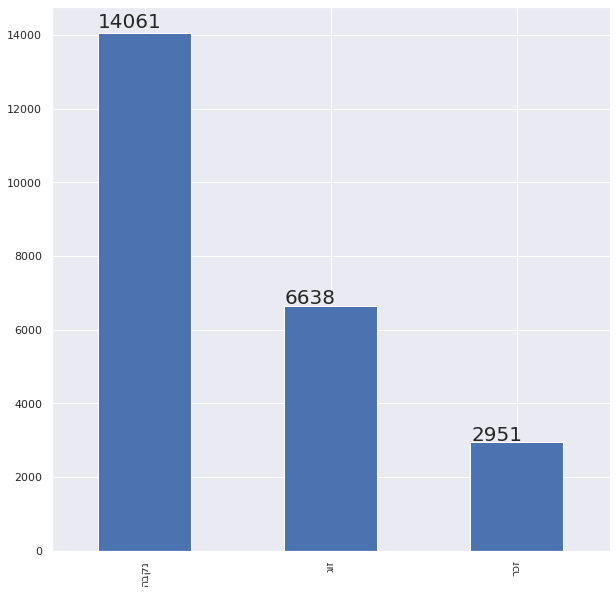

In [179]:
fig,ax=plt.subplots(1,1)
plt.rcParams.update({'font.size':20})
df['gender_name'].apply(lambda x: reverse(x)).value_counts(normalize=False,dropna=False).plot(kind='bar',ax=ax,figsize=(10,10))
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.010),size=20)
plt.show()


In [180]:
def plots(df,col1,col2):
    fig,ax=plt.subplots(1,2)
    plt.rcParams.update({'font.size':12})
    dfo=df_rev_col(df,[col1,col2])
    dfo.groupby([col1,col2]).size().unstack(level=1).plot(kind='bar',stacked=False,ax=ax[0],figsize=(20,10))
    gk=dfo.groupby([col1,col2]).size().unstack()
    gk['sum']=gk.sum(axis=1)
    gk=round(gk.div(gk['sum'],axis=0),2)
    gk=gk.drop(['sum'],axis=1)
    for p in ax[0].patches:
        ax[0].annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
    ax[0].legend(prop={'size':12},loc=1)
    ax[0].title.set_text(reverse(f'התפלגות לפי כמויות'))
    ax[1].title.set_text(reverse(f'התפלגות  לפי  אחוזים'))
    gk.plot(kind='bar',ax=ax[1],legend=None)
    for p in ax[1].patches:
        ax[1].annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
    plt.show()



In [181]:
df.dtypes
#df['gender_code']=df['gender_code'].astype('int64')


residence_type               object
sug_erua                     object
t_call               datetime64[ns]
month                         int64
hour                          int64
year                          int64
day_type                     object
day                          object
id                            int64
gender_code                 float64
gender_name                  object
lon_code                      int64
lon_desc                     object
action_desc                  object
act_category                 object
type_category                object
season                       object
counts                        int64
quantile_10_count          category
out_std                        bool
q_out                          bool
dtype: object

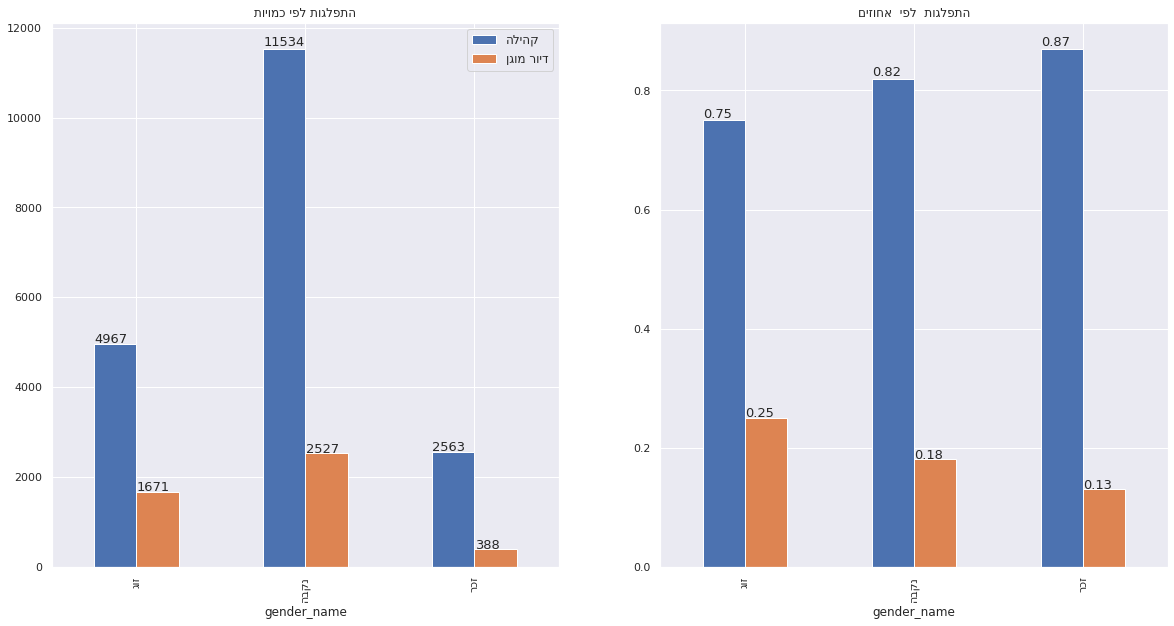

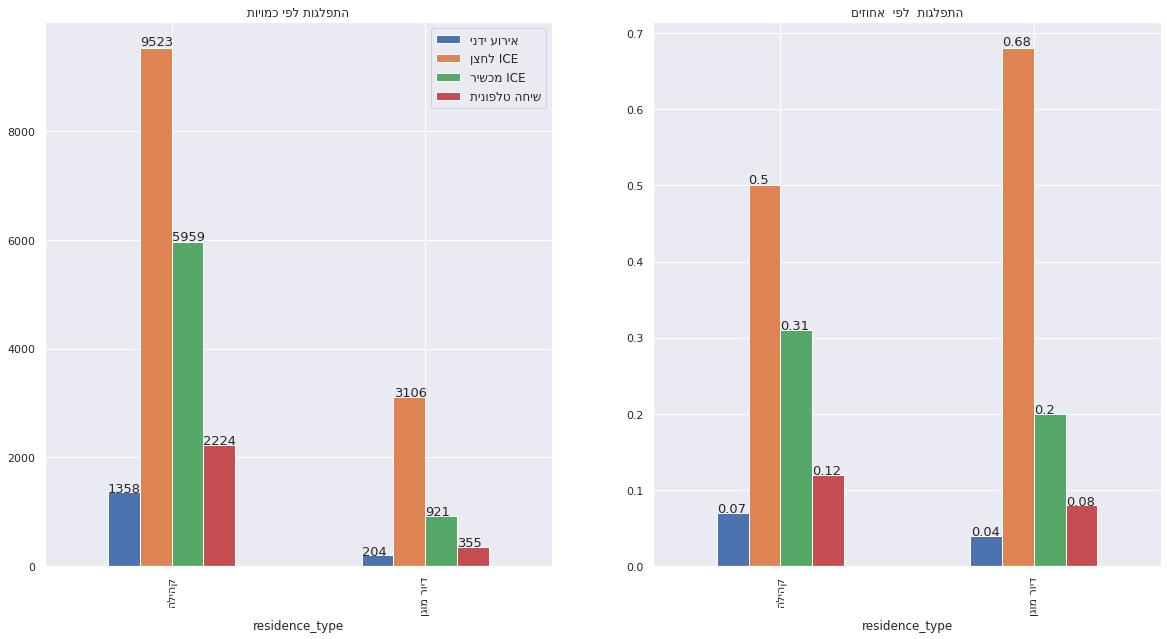

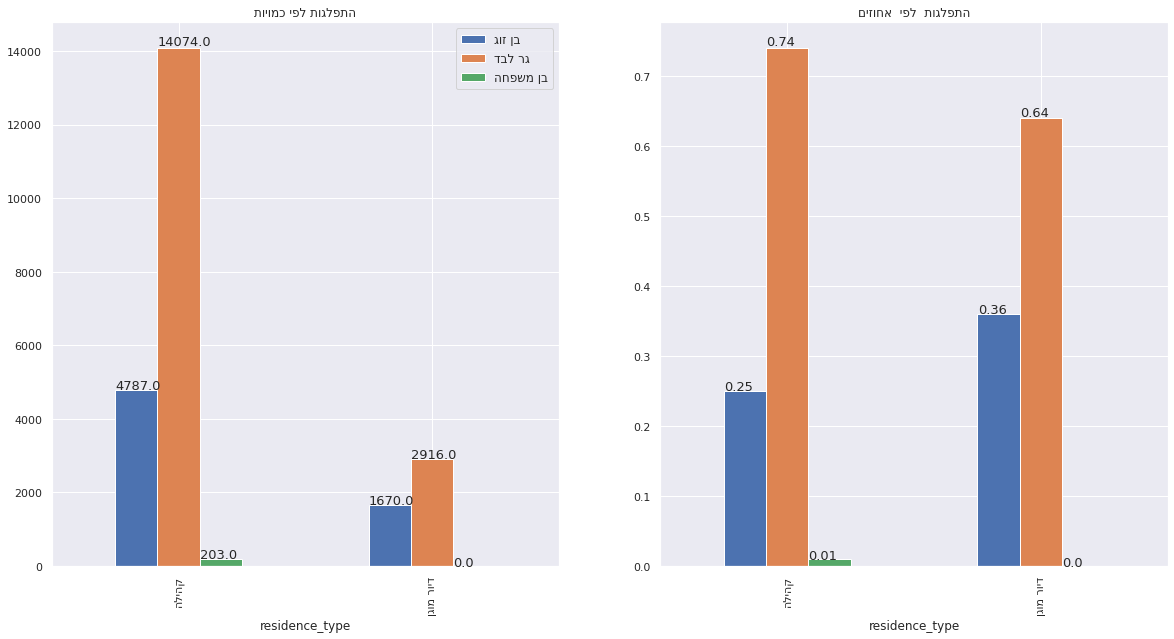

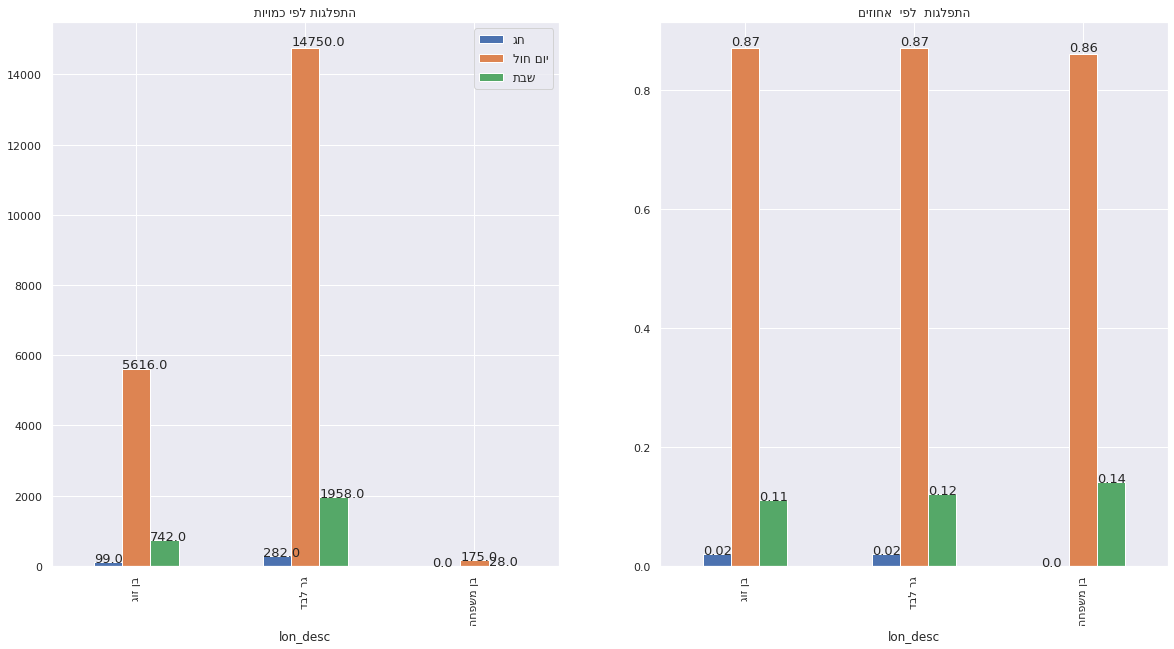

In [182]:
plots(df,'gender_name','residence_type')
plots(df,'residence_type','sug_erua')
plots(df,'residence_type','lon_desc')
plots(df,'lon_desc','day_type')

In [183]:
for i in df.columns:
    if df[i].nunique()>30:
        continue
    print(f'option for {i}',df[i].value_counts(normalize=True).to_frame())
    print("---------------#---------------")


option for residence_type            residence_type
קהילה            0.806089
דיור מוגן        0.193911
---------------#---------------
option for sug_erua               sug_erua
ECI לחצן      0.533996
ECI מכשיר     0.290909
שיחה טלפונית  0.109049
אירוע ידני    0.066047
---------------#---------------
option for month        month
1   0.095645
10  0.090994
3   0.089767
12  0.087949
4   0.087484
5   0.085581
11  0.080592
6   0.078689
8   0.077590
9   0.076617
2   0.076025
7   0.073066
---------------#---------------
option for hour         hour
10  0.080592
9   0.080169
11  0.068288
8   0.067865
12  0.065370
17  0.060085
14  0.054334
19  0.054038
15  0.052854
16  0.052516
18  0.052389
13  0.050782
20  0.047653
7   0.041649
21  0.036660
22  0.026342
6   0.022664
23  0.019281
0   0.014926
5   0.011459
4   0.011290
1   0.011205
2   0.010190
3   0.007400
---------------#---------------
option for year           year
2016  0.175899
2015  0.174376
2017  0.172939
2014  0.160211
2012  0.158351


In [184]:
for i in data.columns:
    if data[i].nunique()>30:
        continue
    print(f'option for {i}',data[i].unique())


option for residence_type ['קהילה' 'דיור מוגן']
option for sug_erua ['חשמל ECI' 'בדיקת תקינות' 'ECI לחצן' 'סוללה חלשה ECI' 'ECI מכשיר'
 'שיחה טלפונית' 'אירוע ידני' 'קריאה שמירת קשר' 'נייד קרני']
option for month [ 1  2  3  4  5  6  7  8  9 10 11 12]
option for hour [ 0  4  8  9 10 11 12 17 22  1  2  7 14 16  5 15 21  6 13 19 18 20 23  3]
option for year [2012 2013 2014 2015 2016 2017]
option for day_type ['יום חול' 'שבת' 'חג']
option for day ['ראשון' 'שני' 'שלישי' 'רביעי' 'חמישי' 'שישי' 'שבת']
option for gender_code [ 5.  6.  4. nan]
option for gender_name ['נקבה' 'זוג' 'זכר' nan]
option for lon_code [1 2 3]
option for lon_desc ['גר לבד' 'בן זוג' 'בן משפחה']
option for act_category ['חסר תיאור' 'שירותי רופא' 'ניסוי' 'ייעוץ טלפוני' 'שירות טכני' 'איתחול'
 'טעות' 'תשומת לב' 'ניתוק' 'החלפת נציג שירות' 'שירותי אמבולנס'
 'עדכון נתונים' 'מנוי לא עונה' 'בירור' 'תלונה' 'ללא פעולות' 'נפילה'
 'פנייה לסיוע כללי' 'פעולות איש קשר' 'מתעניינים בשירות' 'נפילה והרמה'
 'זימון משטרה' 'הפנייה טופלה' 'המנוי

In [185]:
df[df['type_category']=='חסר תיאור']['act_category'].value_counts(normalize=True)

חסר תיאור    1.0
Name: act_category, dtype: float64

In [186]:
def plot_values_counts(df,col1):
    fig,ax=plt.subplots(1,1,figsize=(5, 5))

    if df[col1].dtype=='int64':
        round(df[col1].value_counts(normalize=True),3).plot(kind='bar',ax=ax)
        plt.show()
        return
    round(df[col1].apply(lambda x : reverse(x)).value_counts(normalize=True),3).plot(kind='barh',ax=ax)
    #for p in ax.patches:
             #ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.001),size=15)
    ax.title.set_text(f'{col1} distribution')
             #ax.tick_params(axis='x', labelsize=15)
    plt.show()

In [187]:
columns_to_view=['residence_type', 'sug_erua', 'year',
       'day_type', 'day', 'gender_name',
       'lon_desc', 'action_desc', 'act_category', 'type_category', 'season']

In [188]:
df.dtypes

residence_type               object
sug_erua                     object
t_call               datetime64[ns]
month                         int64
hour                          int64
year                          int64
day_type                     object
day                          object
id                            int64
gender_code                 float64
gender_name                  object
lon_code                      int64
lon_desc                     object
action_desc                  object
act_category                 object
type_category                object
season                       object
counts                        int64
quantile_10_count          category
out_std                        bool
q_out                          bool
dtype: object

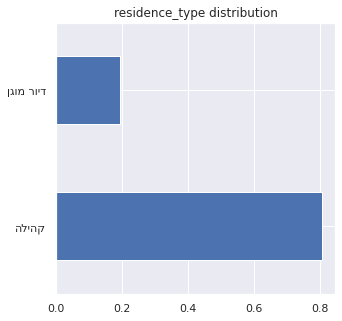

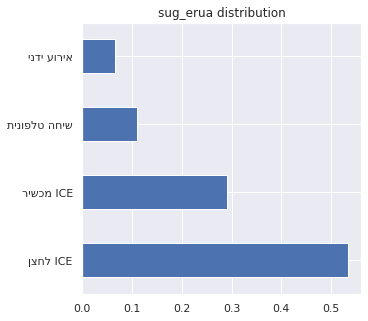

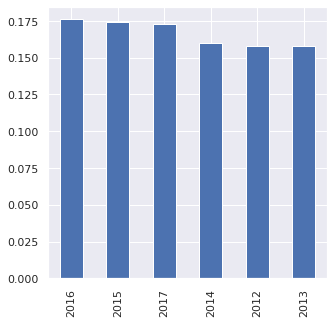

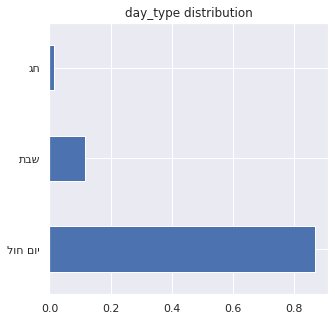

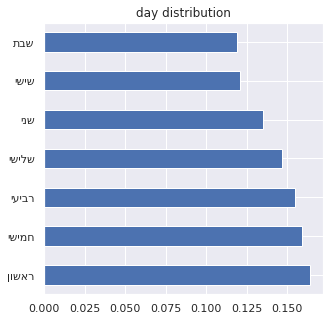

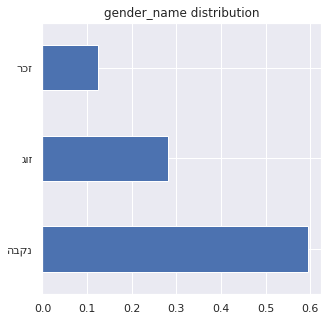

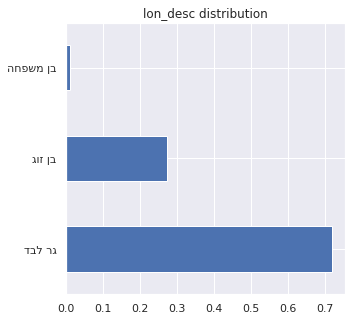

TypeError: 'float' object is not subscriptable

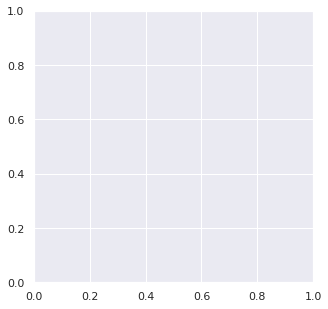

In [189]:
for i in columns_to_view:
    ax=plot_values_counts(df,i)

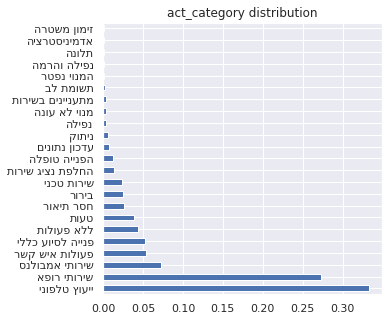

In [127]:
plot_values_counts(df,'act_category')

In [85]:
df.dtypes

residence_type               object
sug_erua                     object
t_call               datetime64[ns]
month                         int64
hour                          int64
year                          int64
day_type                     object
day                          object
id                            int64
gender_code                 float64
gender_name                  object
lon_code                      int64
lon_desc                     object
action_desc                  object
act_category                 object
type_category                object
season                       object
counts                        int64
quantile_10_count          category
out_std                        bool
q_out                          bool
dtype: object

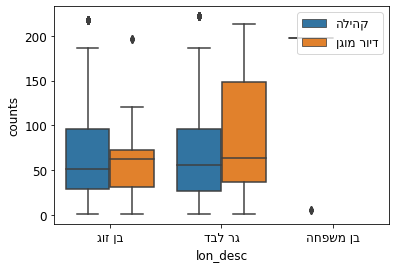

In [82]:
g=sns.boxplot(y = df['counts'], x = df['lon_desc'].apply(lambda x:reverse(x)),hue=df['residence_type'].apply(lambda x:reverse(x)))
plt.legend(loc='upper right')

In [83]:
dfo=df[['lon_desc','residence_type','gender_name','act_category','action_desc']]
for x in dfo.columns:
    dfo[x]=dfo[x].apply(lambda x:reverse(x))
dfo['counts']=df['counts']


g = sns.catplot(x="residence_type", y="counts",col_wrap=8,
                hue="lon_desc", col="act_category",
                data=dfo, kind="violin",
                height=4, aspect=0.8)
g.savefig("output.png")

/home/yaron/miniconda3/envs/main/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


TypeError: 'float' object is not subscriptable

In [86]:
df['t_call_int']=pd.to_datetime(df['t_call']).astype(np.int64)
#len(df.loc[(df['id']==3222)&(x['act_category']<50)])

<ipython-input-86-77e1cc1becc9>:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['t_call_int']=pd.to_datetime(df['t_call']).astype(np.int64)


In [87]:
df['count_until_t_Call']=0
for index, row in df.iterrows():
    #if index>4:
    #    break
    id=row['id']
    date=row['t_call_int']
    val=len(df.loc[(df['id']==id)&(df['t_call_int']<date)])
    df.loc[index,'count_until_t_Call']=int(val)
   

In [88]:
df['act_category'].unique()

array(['שירותי רופא', 'ייעוץ טלפוני', 'חסר תיאור', 'שירות טכני', 'טעות',
       'תשומת לב', 'ניתוק', 'החלפת נציג שירות', 'שירותי אמבולנס',
       'עדכון נתונים', 'מנוי לא עונה', 'בירור', 'תלונה', 'ללא פעולות',
       'נפילה', 'פנייה לסיוע כללי', 'מתעניינים בשירות', 'פעולות איש קשר',
       'נפילה והרמה', 'זימון משטרה', 'הפנייה טופלה', 'המנוי נפטר',
       'אדמיניסטרציה'], dtype=object)

In [89]:
act_cat_lev=['ללא פעולות','טעות','ניסוי','חסר תיאור']
df_lev=df[df['act_category'].isin(act_cat_lev)]
df_lev_6h=df_lev[df_lev['quantile_10_count'].isin(['8','9','10'])]
df_lev_3l=df_lev[df_lev['quantile_10_count'].isin(['1','2','3'])]


In [90]:
df['counts'].describe()

count    23650.000000
mean        71.505877
std         54.079764
min          1.000000
25%         29.000000
50%         57.000000
75%         97.000000
max        222.000000
Name: counts, dtype: float64

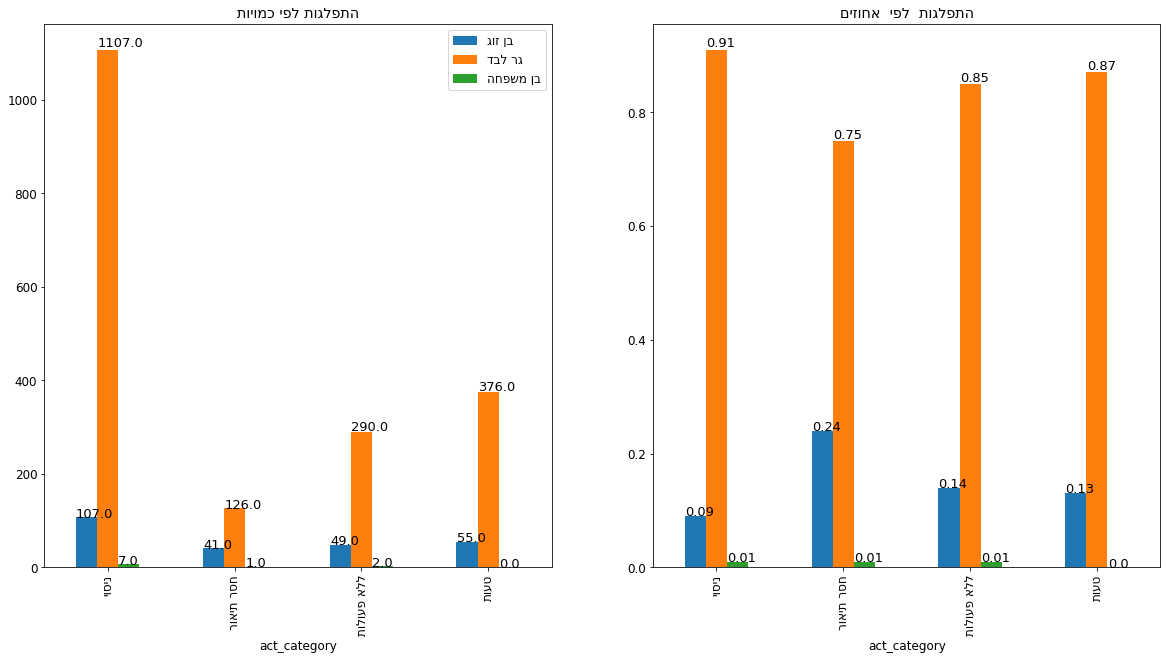

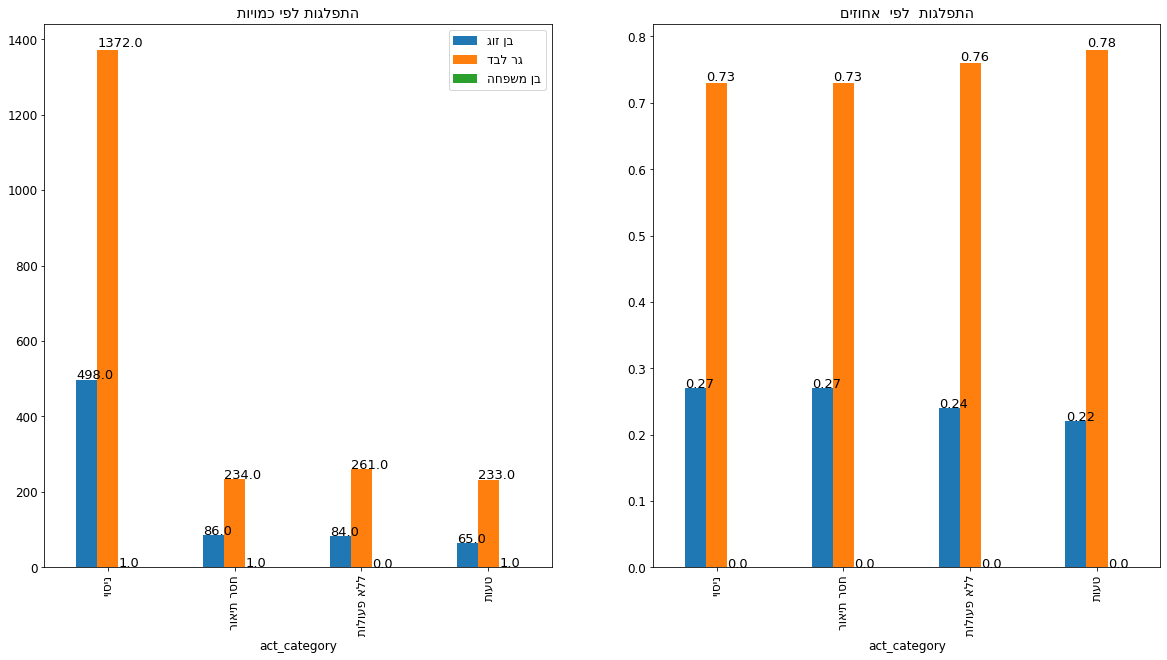

In [110]:
plots(df_lev_6h,'act_category','lon_desc')

plots(df_lev_3l,'act_category','lon_desc')

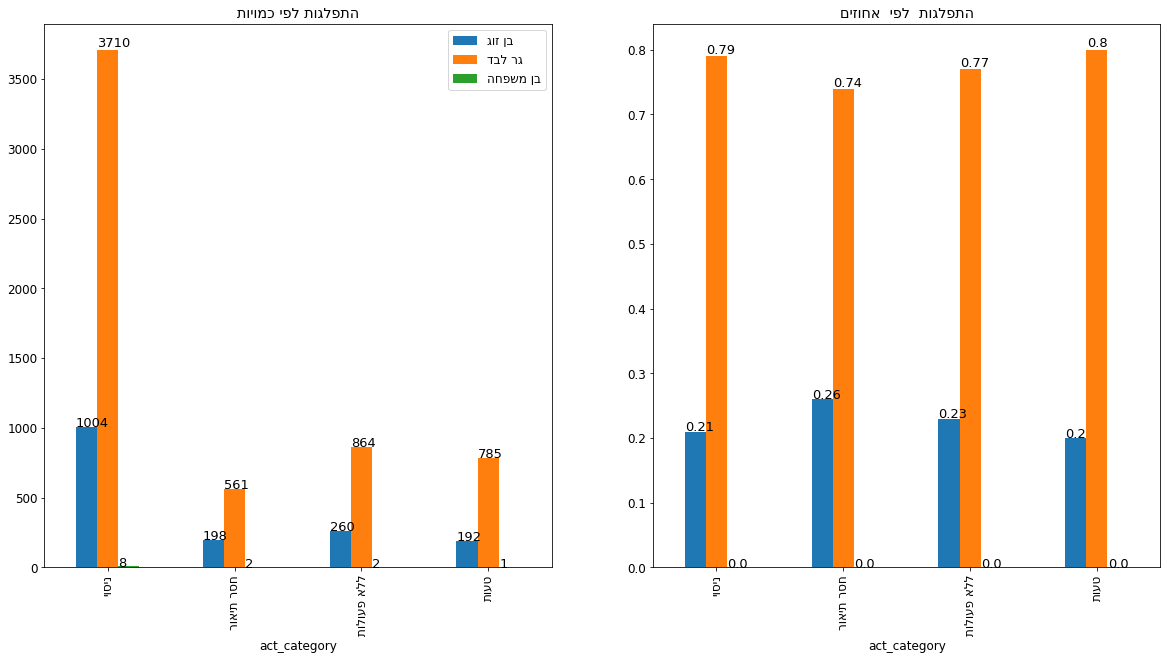

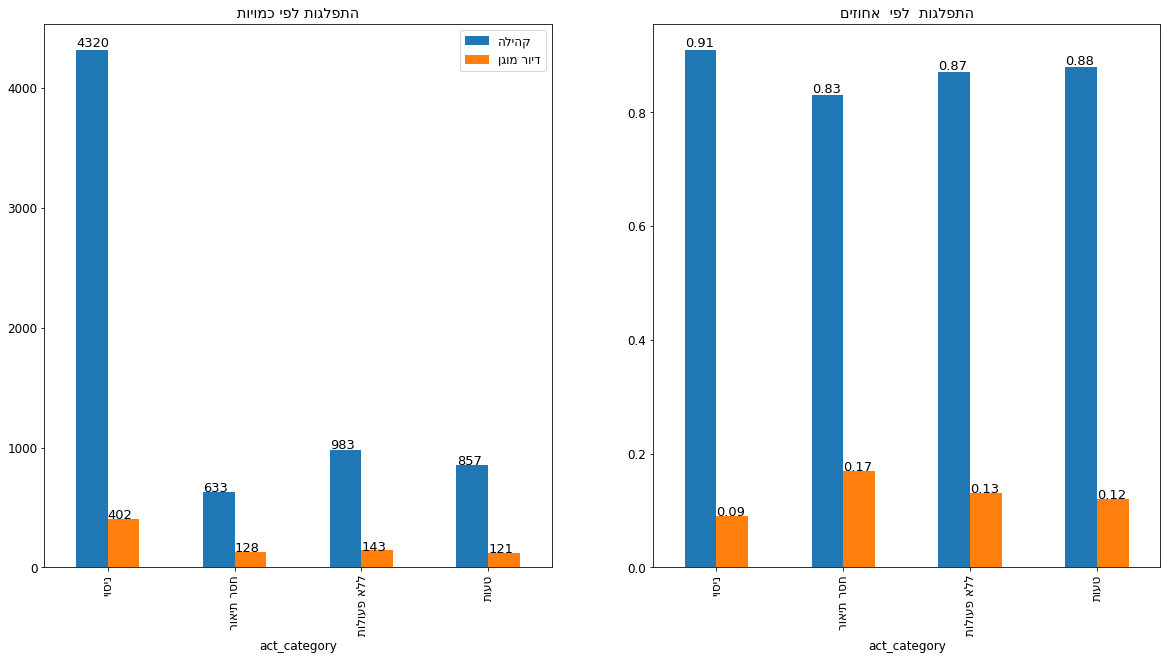

In [44]:
# מתוך קטוגריות פעולה שחשודות כאינטראקציה חברתית מה ההתפלגות של הפונים לפי רמת בדידות
plots(df_lev,'act_category','lon_desc')
# מתוך קטגוריות 
#שחשובדות כאינטקרציה חברתית מה ההתפלגות של הפונים לפי סוג דיור
plots(df_lev,'act_category','residence_type')

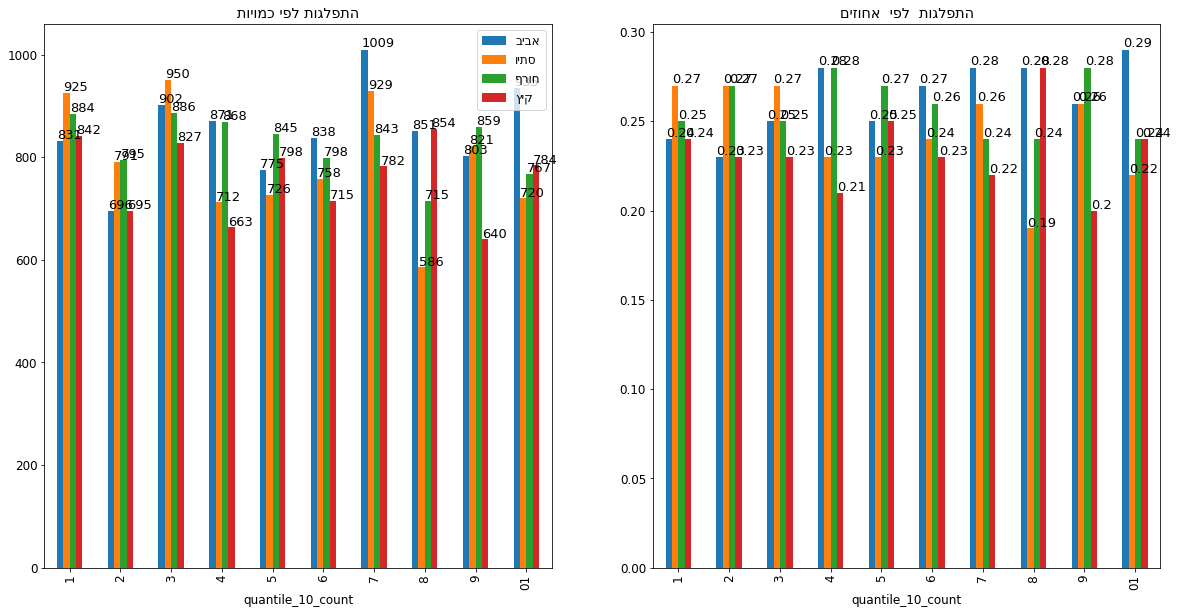

In [45]:
plots(df,'quantile_10_count','season')

In [47]:
df.columns

Index(['residence_type', 'sug_erua', 't_call', 'month', 'hour', 'year',
       'day_type', 'day', 'id', 'gender_code', 'gender_name', 'lon_code',
       'lon_desc', 'action_desc', 'act_category', 'type_category', 'season',
       'counts', 'quantile_10_count', 't_call_int', 'count_until_t_Call'],
      dtype='object')

In [48]:
df[df['counts']>=100]['id'].unique().

SyntaxError: invalid syntax (Temp/ipykernel_4860/2122584532.py, line 1)

In [ ]:
freq['id'].describe().plot()

In [ ]:
df[df['id']==241113]['year'].value_counts()

In [ ]:
df.to_excel("data_after_cleaned.xlsx",index=False)  

In [ ]:
lof_col=['month', 'hour', 'year', 'gender_code', 'lon_code']
numeric_col=['month','year','gender_code','lon_code','']
categorial_col=['residence_type','sug_erua','day_type','day','action_desc','act_category','type_category','season']
x=df.copy()
for col in categorial_col:
    x[col] = x[col].astype('category').cat.codes

In [ ]:
x=x.drop(['t_call','gender_name','lon_desc'], axis=1)

In [ ]:
x

In [ ]:
clf = LocalOutlierFactor(n_neighbors=50, contamination=0.1)
y_pred = clf.fit_predict(x.values)

In [ ]:
y_pred

In [ ]:
x['LocalOutlierFactor']=pd.Series(y_pred)

In [ ]:
df['action_desc'].unique()

In [ ]:
coco=df[df['action_desc']=='המנוי נפטר']

In [ ]:
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
plots(coco,'quantile_10_count','gender_name')

In [ ]:
x[x['counts']<4]['LocalOutlierFactor'].value_counts(dropna=False)#.plot(kind='bar')

In [ ]:
sns.scatterplot(data=x, x="residence_type", y="quantile_10_count", hue="LocalOutlierFactor")

In [376]:
df.columns

Index(['residence_type', 'sug_erua', 't_call', 'month', 'hour', 'year',
       'day_type', 'day', 'id', 'gender_code', 'gender_name', 'lon_code',
       'lon_desc', 'action_desc', 'act_category', 'type_category', 'season',
       'counts', 'quantile_10_count', 'out_std', 'q_out'],
      dtype='object')

[Text(0.5, 1.0, 'רדגמ יפל תוינפה תומכ תוגלפתה')]

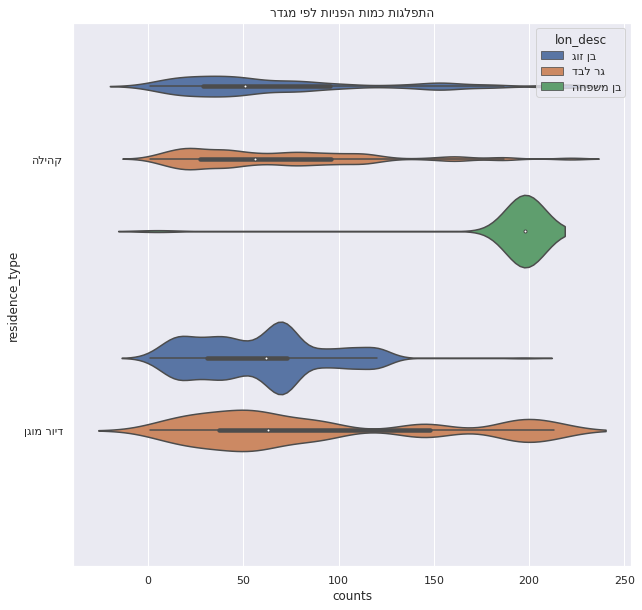

In [129]:
#sns.swarmplot(y = x['residence_type'], x = x['lon_code'])
sns.set(rc={"figure.figsize":(10, 10)})
sns.violinplot(y = df['residence_type'].apply(lambda x:reverse(x)), x = df['counts'],hue=df['lon_desc'].apply(lambda x:reverse(x))).set(title=reverse('התפלגות כמות הפניות לפי מגדר'))


[Text(0.5, 1.0, 'רדגמ יפל תוינפה תומכ תוגלפתה')]

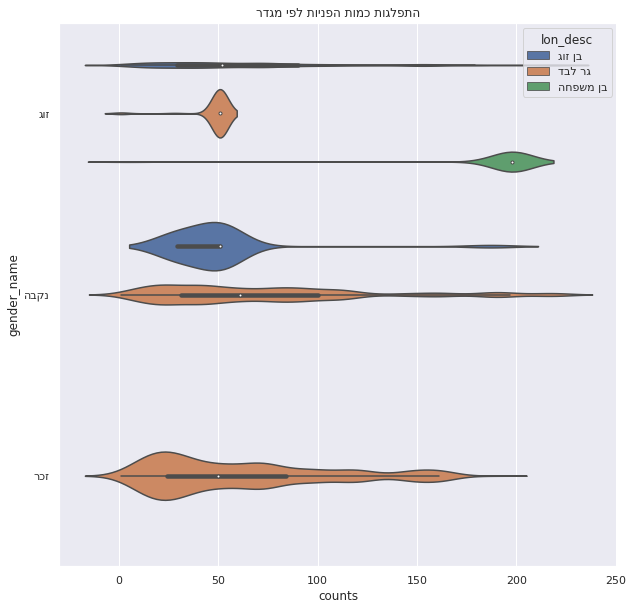

In [130]:
#sns.swarmplot(y = x['residence_type'], x = x['lon_code'])
sns.set(rc={"figure.figsize":(10, 10)})
sns.violinplot(y = df['gender_name'].apply(lambda x:reverse(x)), x = df['counts'],hue=df['lon_desc'].apply(lambda x:reverse(x))).set(title=reverse('התפלגות כמות הפניות לפי מגדר'))


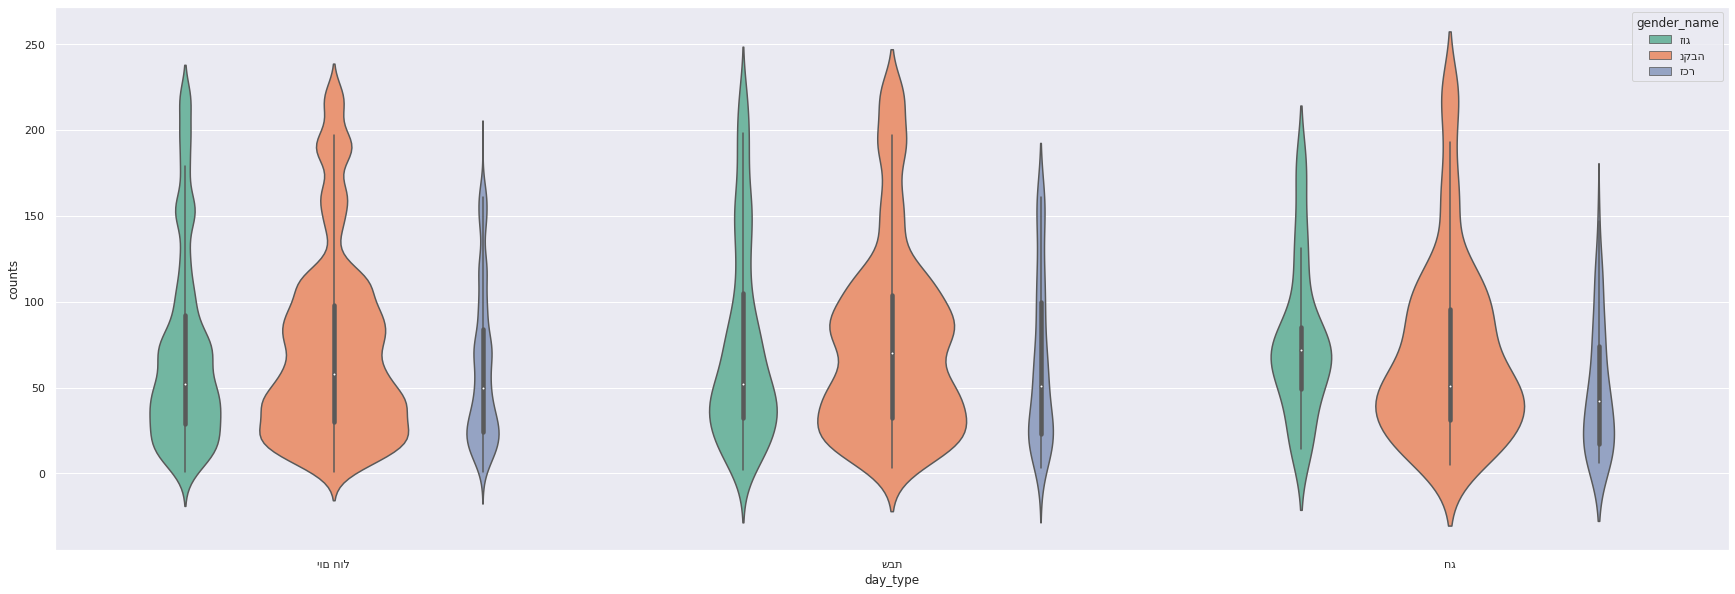

In [94]:
sns.set(rc={"figure.figsize":(30, 10)})
ax = sns.violinplot(x="day_type", y="counts", hue="gender_name",
                    data=df, palette="Set2",
                    scale="count")

/home/yaron/miniconda3/envs/main/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/yaron/miniconda3/envs/main/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/yaron/miniconda3/envs/main/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

Text(0.5, 1.05, 'My super title')

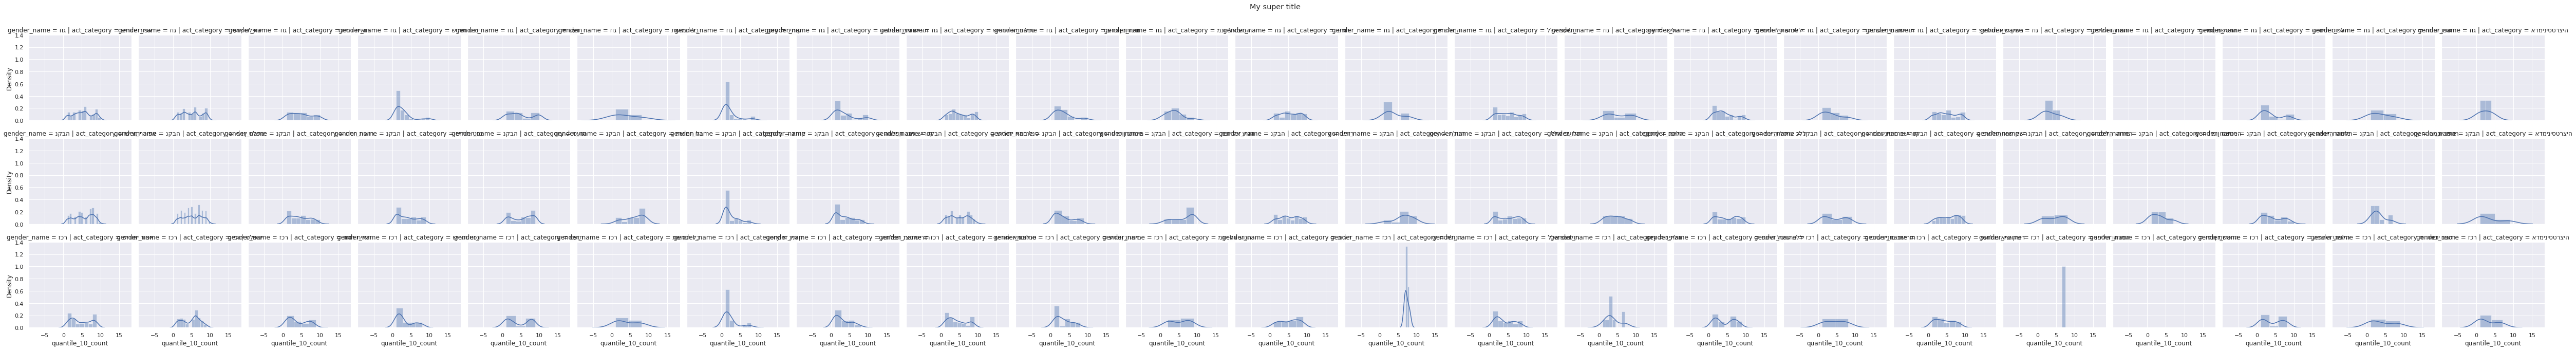

In [131]:
sns.set(rc={"figure.figsize":(10, 10)})
df
sns.FacetGrid(df, col = 'act_category', row = 'gender_name').map(sns.distplot, 'quantile_10_count').fig.suptitle("My super title", y=1.05)

In [50]:
df.columns

Index(['residence_type', 'sug_erua', 't_call', 'month', 'hour', 'year',
       'day_type', 'day', 'id', 'gender_code', 'gender_name', 'lon_code',
       'lon_desc', 'action_desc', 'act_category', 'type_category', 'season',
       'counts', 'quantile_10_count', 't_call_int', 'count_until_t_Call'],
      dtype='object')

In [53]:
df['action_desc'].value_counts()
df['action_desc'].unique()

array(['רופא - הוזמן', 'רופא - הגיע', 'רופא - בקשה', 'ניסוי - מנוי',
       'ייעוץ טלפוני - הוזמן', 'ייעוץ טלפוני - בקשה',
       'ייעוץ טלפוני - בוצע', 'תשומת לב עבור ריקים',
       'תקלה - מכשיר לא תקין', 'New After Deleted', 'ניסוי - אב בית',
       'טעות', 'בירור- רופא', 'תשומת לב', 'ניתוק - מנוי פרטי',
       'החלפה - נציג שירות', 'ניסוי - מעבדה ', 'אמבולנס - הוזמן',
       'אמבולנס - הגיע', 'אמבולנס - בקשה', 'רופא - ביטול',
       'עדכון  נתוני מנוי', 'תקלה - מכשיר מרעיש',
       'תקלה - בעיות בקו טלפון', 'מנוי לא עונה', 'בירור- יעוץ טלפוני',
       'תלונה', 'בירור- חברת רופאים', 'בירור- החזר אמבולנס',
       'בירור- אמבולנס', 'תקלה - שעון לא עובד', 'ללא פעולות', 'נפילה',
       'ניתוק - מנוי קבוצתי', 'ניסוי - נציג שירות ', 'פנייה לסיוע כללי',
       'תקלה - מכשיר קרא מעצמו', 'איש קשר - בקשה', 'איש קשר - עודכן',
       'אב בית - בקשה', 'איש קשר - הוזמן', 'טכנאי - עזרה כללית',
       'אב בית - הוזמן', 'טכנאי - תיאום החלפה', 'תקלה - רצועה לשעון',
       'אמבולנס - ביטול', 'בירור - 

In [54]:
df[df['action_desc']=='תקלה - שעון התפרק']

residence_type   sug_erua                  t_call  month  hour  year  \
36710          קהילה  ECI מכשיר 2013-10-21 08:54:18.753     10     8  2013   

      day_type  day    id  gender_code  ... lon_code  lon_desc  \
36710  יום חול  שני  3533          5.0  ...        1    גר לבד   

             action_desc act_category                  type_category season  \
36710  תקלה - שעון התפרק   שירות טכני  קריאות חירום - שירותים כלליים   סתיו   

      counts  quantile_10_count           t_call_int  count_until_t_Call  
36710     91                  6  1382345658753000000                  23  

[1 rows x 21 columns]

In [111]:
for act in df['act_category'].unique():
    print('***act***:',act)
    print(df[df['act_category']==act]['quantile_10_count'].value_counts(dropna=False))
    print('--------------------------------------')
#df['act_category'].nunique()

***act***: שירותי רופא
7     856
8     792
5     781
9     772
4     765
6     702
10    673
3     657
2     535
1     496
Name: quantile_10_count, dtype: int64
--------------------------------------
***act***: ניסוי
1     725
3     595
2     551
7     462
8     461
10    451
5     425
6     373
4     370
9     309
Name: quantile_10_count, dtype: int64
--------------------------------------
***act***: ייעוץ טלפוני
10    1046
7     1030
6     1001
3      945
4      882
9      882
5      875
1      748
8      707
2      678
Name: quantile_10_count, dtype: int64
--------------------------------------
***act***: חסר תיאור
1     143
3      95
2      83
7      76
5      66
6      66
10     65
4      64
9      53
8      50
Name: quantile_10_count, dtype: int64
--------------------------------------
***act***: שירות טכני
1     114
3      94
2      80
4      50
7      49
6      46
5      41
8      41
10     36
9      17
Name: quantile_10_count, dtype: int64
-------------------------------------

<AxesSubplot:>

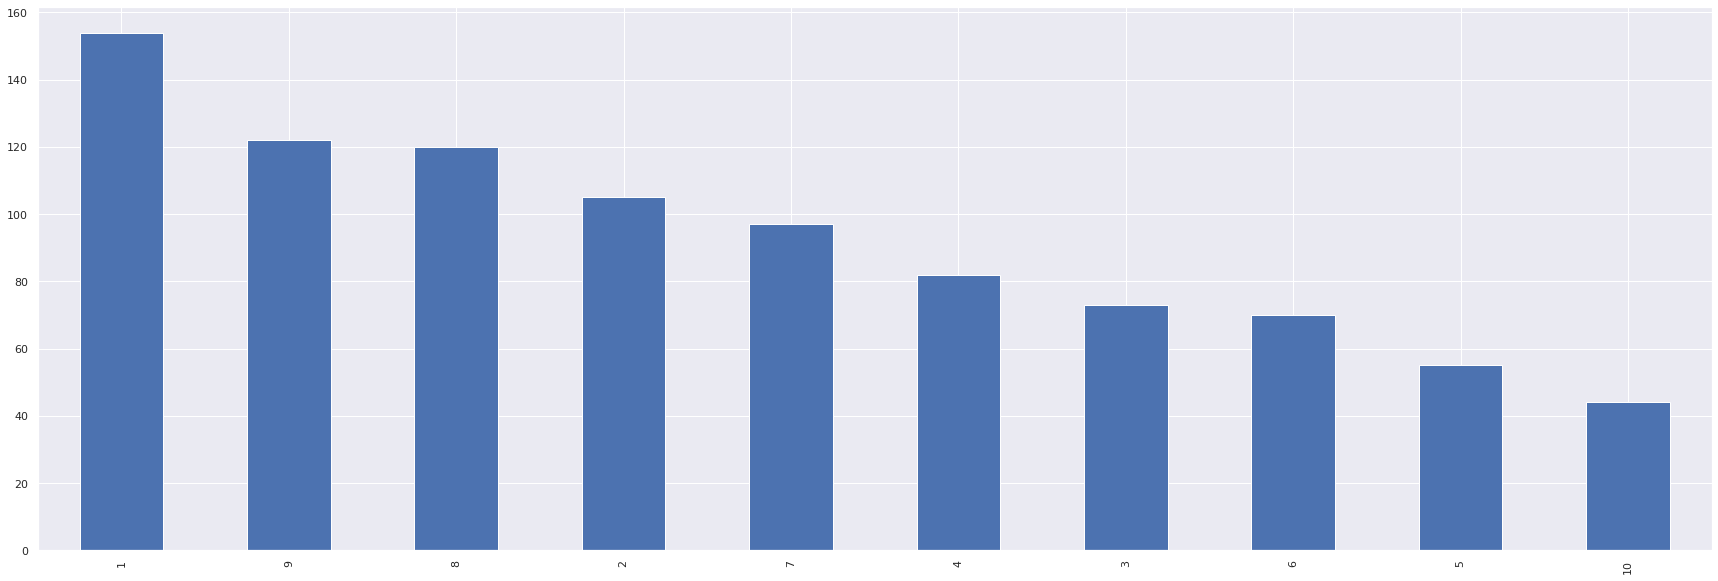

In [95]:
df[df['action_desc']=='טעות']['quantile_10_count'].value_counts().plot(kind='bar')

In [96]:
['quantile_10_count'].value_counts().plot(kind='bar')

AttributeError: 'list' object has no attribute 'value_counts'

<AxesSubplot:>

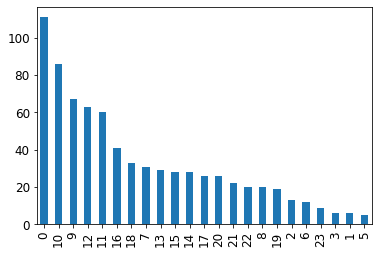

In [127]:
df[df['action_desc']=='תשומת לב עבור ריקים']['hour'].value_counts().plot(kind='bar')

In [97]:
#df[(df['action_desc']=='תשומת לב עבור ריקים') & (df['counts']<5)]

df[df['lon_code']==1]['act_category'].value_counts()

#|df[df['id']==241799]


ייעוץ טלפוני        5515
שירותי רופא         4544
שירותי אמבולנס      1242
פנייה לסיוע כללי     952
פעולות איש קשר       883
ללא פעולות           789
טעות                 731
חסר תיאור            455
שירות טכני           432
בירור                418
החלפת נציג שירות     237
הפנייה טופלה         221
עדכון נתונים         127
ניתוק                111
מנוי לא עונה          68
מתעניינים בשירות      67
נפילה                 65
תשומת לב              41
אדמיניסטרציה          21
נפילה והרמה           21
המנוי נפטר            19
תלונה                 16
זימון משטרה           15
Name: act_category, dtype: int64

In [165]:
df[df['lon_code']==3].nunique()

#df

residence_type         1
sug_erua               4
t_call                79
month                 12
hour                  17
year                   6
day_type               2
day                    7
id                     2
gender_code            1
gender_name            1
lon_code               1
lon_desc               1
action_desc           24
act_category          13
type_category          3
season                 4
counts                 2
quantile_10_count      2
t_call_int            79
count_until_t_Call    77
dtype: int64

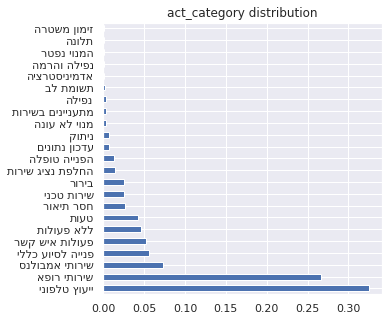

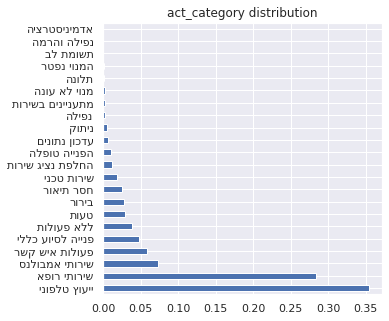

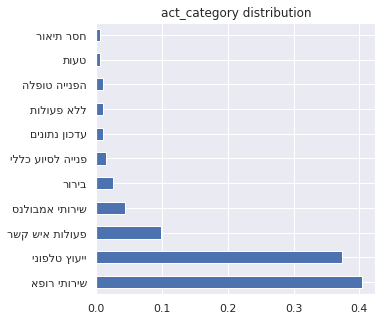

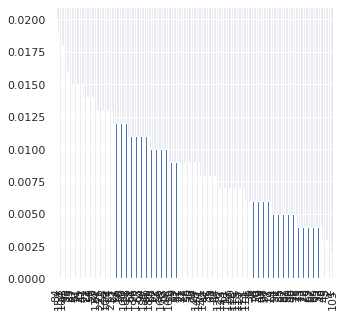

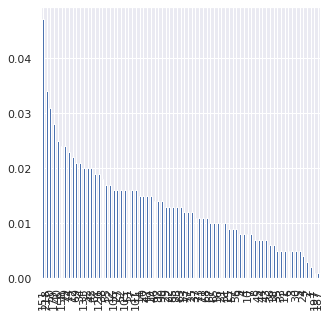

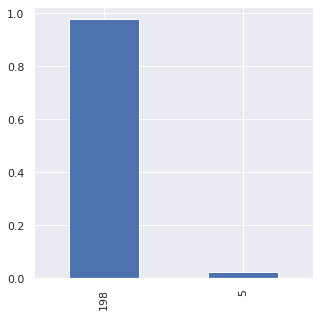

In [133]:
plot_values_counts(df[df['lon_code']==1],'act_category')
plot_values_counts(df[df['lon_code']==2],'act_category')
plot_values_counts(df[df['lon_code']==3],'act_category')
plot_values_counts(df[df['lon_code']==1],'counts')
plot_values_counts(df[df['lon_code']==2],'counts')
plot_values_counts(df[df['lon_code']==3],'counts')


SyntaxError: 'return' outside function (<ipython-input-135-e083b7042f6c>, line 5)

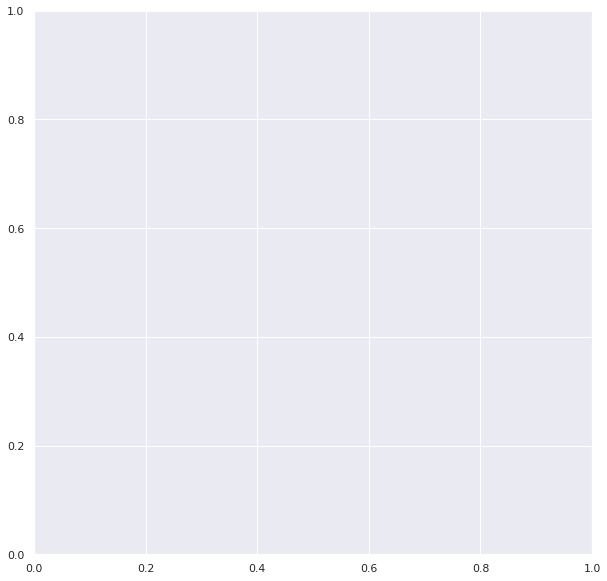

In [135]:
fig,ax=plt.subplots(1,1)
if df[col1].dtype=='int64':
    round(df[col1].value_counts(normalize=True),3).plot(kind='bar',ax=ax)
    plt.show()
    return
round(df[col1].apply(lambda x : reverse(x)).value_counts(normalize=True),3).plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.001),size=13)
ax.title.set_text(f'{col1} distribution')
plt.show()

In [172]:
df.columns

Index(['residence_type', 'sug_erua', 't_call', 'month', 'hour', 'year',
       'day_type', 'day', 'id', 'gender_code', 'gender_name', 'lon_code',
       'lon_desc', 'action_desc', 'act_category', 'type_category', 'season',
       'counts', 'quantile_10_count', 't_call_int', 'count_until_t_Call'],
      dtype='object')

In [173]:
df[df['gender_name']=='זכר']

residence_type   sug_erua                  t_call  month  hour  year  \
19          דיור מוגן   ECI לחצן 2012-01-01 17:52:26.927      1    17  2012   
21          דיור מוגן   ECI לחצן 2012-01-01 17:52:26.927      1    17  2012   
22          דיור מוגן   ECI לחצן 2012-01-01 17:52:26.927      1    17  2012   
67              קהילה   ECI לחצן 2012-01-04 13:17:43.320      1    13  2012   
107             קהילה  ECI מכשיר 2012-01-05 12:17:48.773      1    12  2012   
...               ...        ...                     ...    ...   ...   ...   
129448          קהילה   ECI לחצן 2017-12-28 18:24:31.440     12    18  2017   
129450          קהילה   ECI לחצן 2017-12-28 18:24:31.440     12    18  2017   
129464          קהילה   ECI לחצן 2017-12-29 08:45:27.277     12     8  2017   
129470          קהילה   ECI לחצן 2017-12-29 11:00:44.007     12    11  2017   
129472          קהילה   ECI לחצן 2017-12-29 11:00:44.007     12    11  2017   

       day_type    day      id  gender_code  ... lon_code  lon_desc  \
19      יום חול  ראשון  239867            4  ...        1    גר לבד   
21      יום חול  ראשון  239867            4  ...        1    גר לבד   
22      יום חול  ראשון  239867            4  ...        1    גר לבד   
67      יום חול  רביעי  242671            4  ...        1    גר לבד   
107     יום חול  חמישי  241845            4  ...        1    גר לבד   
...         ...    ...     ...          ...  ...      ...       ...   
129448  יום חול  חמישי  242788            4  ...        1    גר לבד   
129450  יום חול  חמישי  242788            4  ...        1    גר לבד   
129464  יום חול   שישי  242788            4  ...        1    גר לבד   
129470  יום חול   שישי  242788            4  ...        1    גר לבד   
129472  יום חול   שישי  242788            4  ...        1    גר לבד   

                 action_desc      act_category                  type_category  \
19      ייעוץ טלפוני - הוזמן      ייעוץ טלפוני  קריאות חירום - שירותים כלליים   
21       ייעוץ טלפוני - בקשה      ייעוץ טלפוני  קריאות חירום - שירותים כלליים   
22       ייעוץ טלפוני - בוצע      ייעוץ טלפוני  קריאות חירום - שירותים כלליים   
67              ניסוי - מנוי             ניסוי  קריאות חירום - שירותים כלליים   
107     ייעוץ טלפוני - הוזמן      ייעוץ טלפוני  קריאות חירום - שירותים כלליים   
...                      ...               ...                            ...   
129448   ייעוץ טלפוני - בוצע      ייעוץ טלפוני  קריאות חירום - שירותים כלליים   
129450   ייעוץ טלפוני - בקשה      ייעוץ טלפוני  קריאות חירום - שירותים כלליים   
129464      פנייה לסיוע כללי  פנייה לסיוע כללי  קריאות חירום - שירותים כלליים   
129470           בירור-הפניה             בירור  קריאות חירום - שירותים כלליים   
129472           הפניה טופלה      הפנייה טופלה  קריאות חירום - שירותים כלליים   

       season counts  quantile_10_count           t_call_int  \
19       חורף     65                  5  1325440346927000000   
21       חורף     65                  5  1325440346927000000   
22       חורף     65                  5  1325440346927000000   
67       חורף     23                  2  1325683063320000000   
107      חורף     45                  4  1325765868773000000   
...       ...    ...                ...                  ...   
129448   חורף    364                 10  1514485471440000000   
129450   חורף    364                 10  1514485471440000000   
129464   חורף    364                 10  1514537127277000000   
129470   חורף    364                 10  1514545244007000000   
129472   חורף    364                 10  1514545244007000000   

        count_until_t_Call  
19                       0  
21                       0  
22                       0  
67                       0  
107                      0  
...                    ...  
129448                 358  
129450                 358  
129464                 361  
129470                 362  
129472                 362  

[4325 rows x 21 columns]

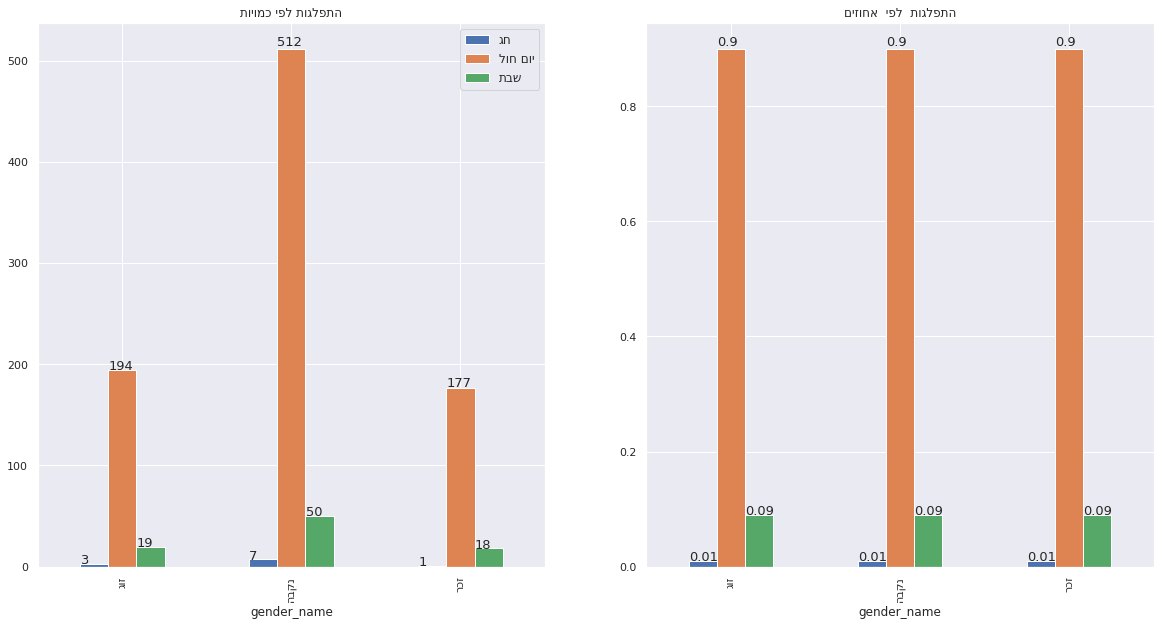

In [136]:
plots(df_lev_3l,'gender_name','day_type')

In [137]:
df.groupby(['gender_name'])['counts'].mean()#.unstack(level=1).plot(kind='bar',stacked=False,ax=ax[0],figsize=(20,10))

gender_name
זוג     71.509340
זכר     61.354795
נקבה    73.634663
Name: counts, dtype: float64

In [138]:
night=[20,21,22,23,0,1,2,3,4,5]
morning=[6,7,8,9,10,11]
noon=[12,13,14,15,16,17]





In [139]:
df.columns

Index(['residence_type', 'sug_erua', 't_call', 'month', 'hour', 'year',
       'day_type', 'day', 'id', 'gender_code', 'gender_name', 'lon_code',
       'lon_desc', 'action_desc', 'act_category', 'type_category', 'season',
       'counts', 'quantile_10_count', 'out_std', 'q_out', 't_call_int',
       'count_until_t_Call'],
      dtype='object')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

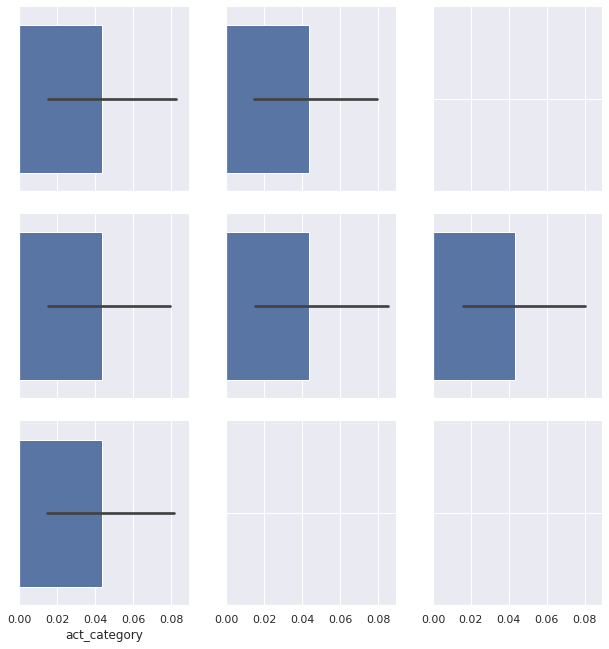

In [140]:
g = sns.FacetGrid(df, col="gender_name",  row="lon_desc")
g.map_dataframe(sns.barplot, x=round(df['act_category'].apply(lambda x : reverse(x)).value_counts(normalize=True),3))

In [141]:
#df[["gender_name", "act_category"]].apply(lambda x:reverse(x)).plot(kind="bar")

#g = sns.FacetGrid(df, col="Team")
#g.map_dataframe(plot_area)




dfo=df[['lon_desc','residence_type','gender_name','act_category']]
for x in dfo.columns:
    dfo[x]=dfo[x].apply(lambda x:reverse(x))
x=pd.DataFrame({'size':dfo.groupby(['gender_name','lon_desc']).size()}).reset_index()

/home/yaron/miniconda3/envs/main/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Text(0.5, 1.0, 'תודידב תמרו רדגמ יפל תומושרה תוגלפתה')

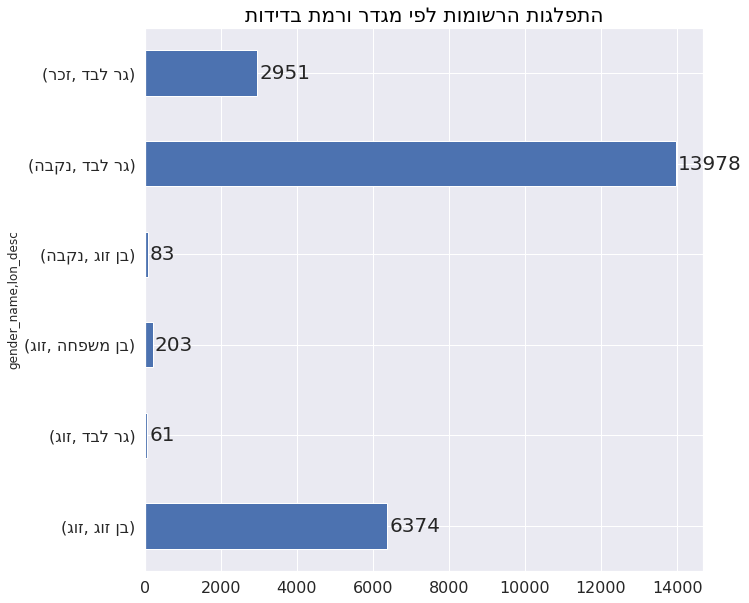

In [142]:
fig,ax=plt.subplots(1,1)
dfo.groupby(['gender_name','lon_desc']).size().plot(kind='barh',figsize=(10, 10),ax=ax)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(2, 0), textcoords='offset points', ha="left", va="center",size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title(reverse('התפלגות הרשומות לפי מגדר ורמת בדידות'),fontdict={'fontsize': 20, 'fontweight': 'medium','color':'black'})


In [557]:
dfi.groupby(['act_category'],sort=False).size()/len(dfi)

act_category
ניסוי               0.153983
ייעוץ טלפוני        0.260040
חסר תיאור           0.023464
שירות טכני          0.019359
שירותי רופא         0.219048
איתחול              0.046816
טעות                0.034169
החלפת נציג שירות    0.010650
שירותי אמבולנס      0.052252
עדכון נתונים        0.005880
ניתוק               0.005159
מנוי לא עונה        0.003550
תלונה               0.000777
בירור               0.018360
תשומת לב            0.001886
ללא פעולות          0.035667
נפילה               0.003106
פנייה לסיוע כללי    0.041935
מתעניינים בשירות    0.003384
פעולות איש קשר      0.041990
נפילה והרמה         0.001054
זימון משטרה         0.000832
הפנייה טופלה        0.015199
המנוי נפטר          0.000721
אדמיניסטרציה        0.000721
dtype: float64

Text(0.5, 1.0, 'גוז ינב רובע תוינפ יאשונ תוגלפתה')

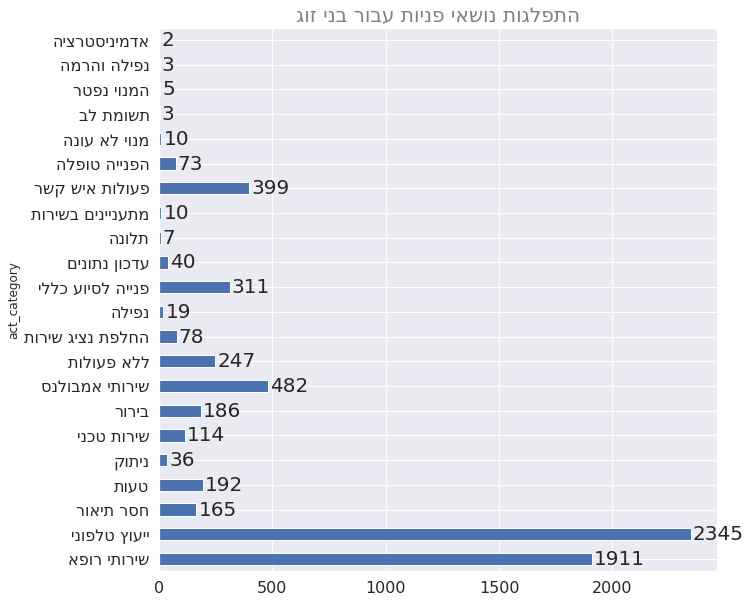

In [191]:
fig,ax=plt.subplots(1,1)
dfi=df.loc[(df['gender_name']=='זוג')]
(dfi.groupby(['act_category'],sort=False).size()).plot(kind='barh',figsize=(10, 10),ax=ax)

labels = [reverse(item.get_text()) for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(2, 0), textcoords='offset points', ha="left", va="center",size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title(reverse('התפלגות נושאי פניות עבור בני זוג'),fontdict={'fontsize': 20, 'fontweight': 'medium','color':'gray'})
# g = sns.FacetGrid(x, col="gender_name",height=10, aspect=0.77)
# g.map_dataframe(sns.barplot, "size", "act_category")
# for ax in g.axes.ravel():
#     for p in ax.patches:
#         ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
#                 xytext=(2, 0), textcoords='offset points', ha="left", va="center")

In [551]:
x=df.loc[(df['gender_name']=='זכר')&(df['lon_desc']=='גר לבד')].groupby(['act_category'],sort=False).size()
x[0]

879

In [471]:
df[df['act_category']=='ללא פעולות']['action_desc'].count()

1033

In [24]:
df.profile_report()

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
גכ